### Imports And Data Loading

In [1]:
import pandas as pd
import seaborn as sns
import os
sns.set(context="notebook", style="whitegrid", font_scale=1.2)

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# "../collected_data\test_20240212-171656.csv"
data_path = os.path.join("..", "collected_data", "test2_20240219-211530.csv")
recording_raw = pd.read_csv(data_path)
recording_raw.head()

recording_filtered = recording_raw[recording_raw.confidence_001 > 0.6]

### Gaze Distribution

In [3]:
def scatter_gaze_positions(data, color_key, suffix):
    x_col = f"norm_pos_x_{suffix}"
    y_col = f"norm_pos_y_{suffix}"
    
    points = plt.scatter(
        x=x_col,
        y=y_col,
        c=color_key,
        cmap="BuGn",
        alpha=0.5,
        data=data
    )
    cbar = plt.colorbar(points)
    cbar.ax.set_ylabel(color_key, rotation=270)
    cbar.ax.get_yaxis().labelpad = 15

    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.xlim([0, 1])
    plt.ylim([0, 1])

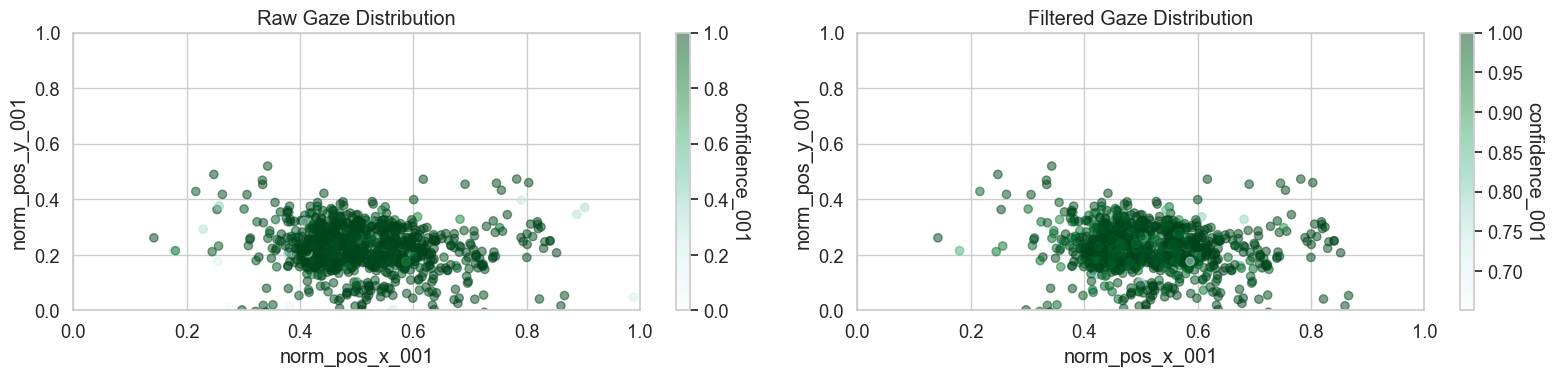

In [4]:
plt.figure(figsize=(16, 4))

plt.subplot(1, 2, 1)
plt.title("Raw Gaze Distribution")
scatter_gaze_positions(recording_raw, "confidence_001", "001")

plt.subplot(1, 2, 2)
plt.title("Filtered Gaze Distribution")
scatter_gaze_positions(recording_filtered, "confidence_001", "001")

plt.tight_layout()

### Diameter Over Time

In [5]:
def plot_diameter_setup(unit):
    plt.xlabel("Time [seconds]")
    plt.ylabel(f"Diameter [{unit}]")

def plot_diameter(data, suffix, unit="pixel"):
    eye0_diameter = f"diameter0_2d_{suffix}" if unit == "pixel" else f"diameter0_3d_{suffix}"
    eye1_diameter = f"diameter1_2d_{suffix}" if unit == "pixel" else f"diameter1_3d_{suffix}"
    plt.plot(data.timestamp, data[eye0_diameter], label="eye0")
    plt.plot(data.timestamp, data[eye1_diameter], label="eye1")
    plot_diameter_setup(unit=unit.split('_')[-1])

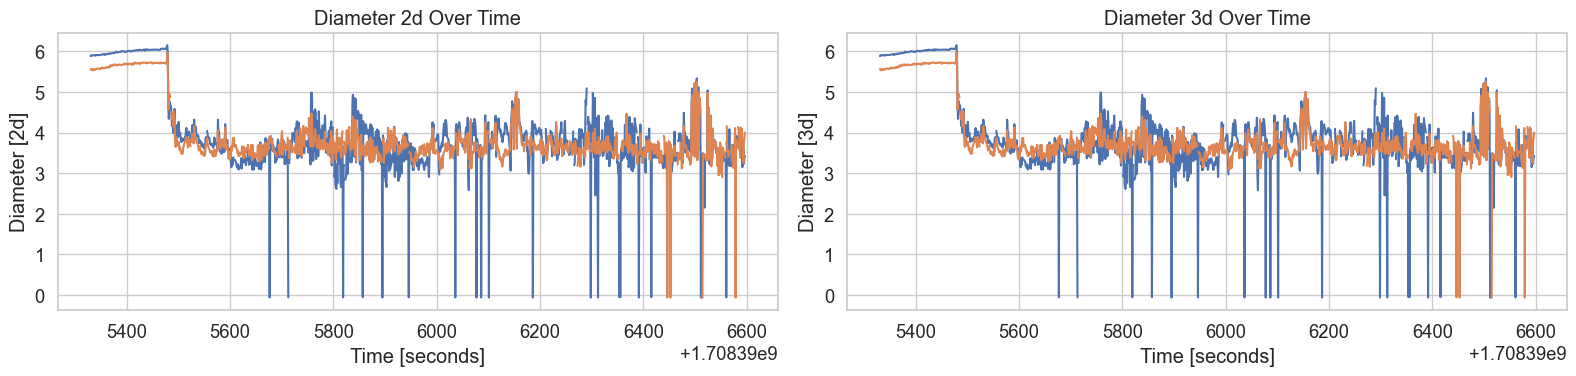

In [6]:
plt.figure(figsize=(16, 4))

plt.subplot(1, 2, 1)
plt.title("Diameter 2d Over Time")
plot_diameter(recording_raw, "001", "2d")

plt.subplot(1, 2, 2)
plt.title("Diameter 3d Over Time")
plot_diameter(recording_raw, "001", "3d")

plt.tight_layout()

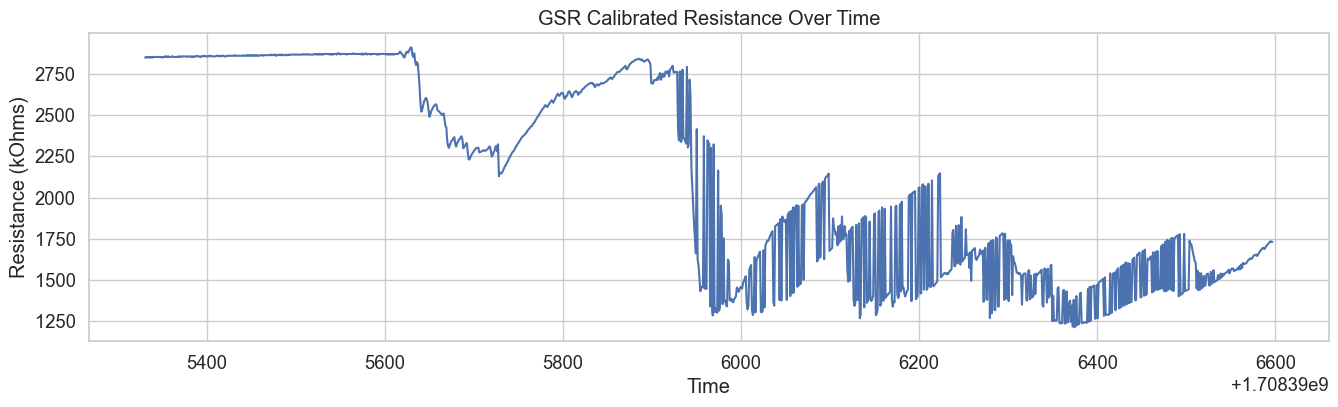

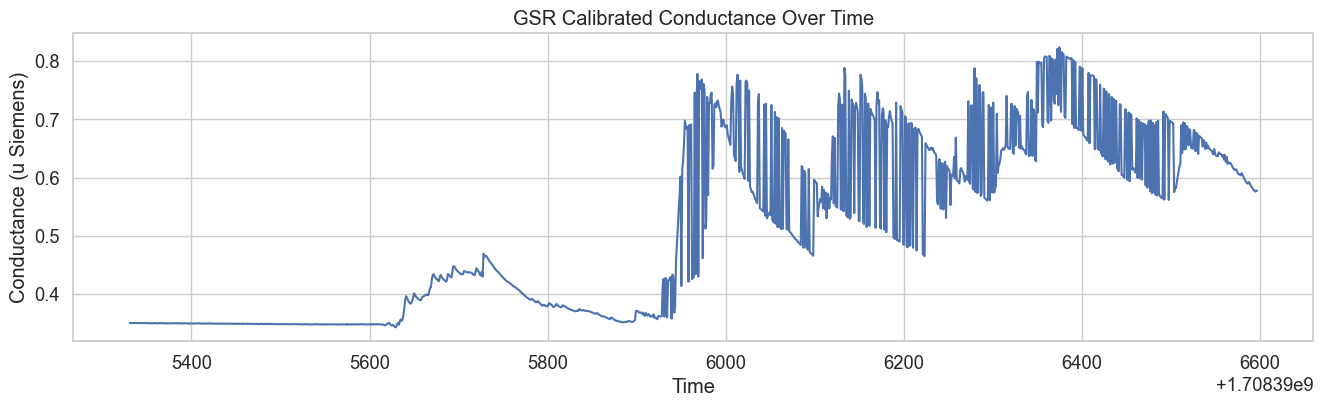

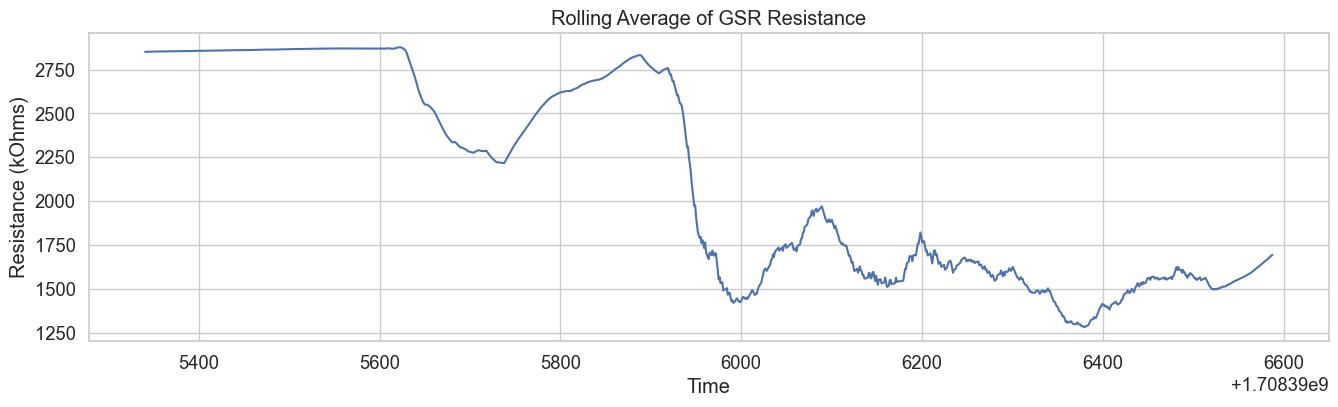

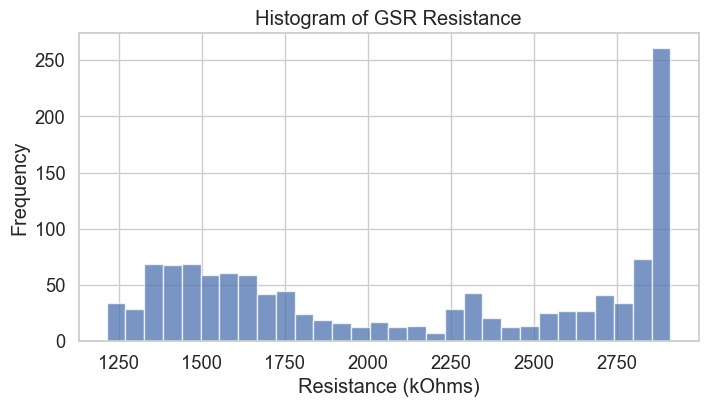

In [7]:
def plot_gsr_time_series(data, gsr_col, title, ylabel):
    plt.figure(figsize=(16, 4))
    plt.plot(data["timestamp"], data[gsr_col])
    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel(ylabel)
    plt.show()

# Example usage:
plot_gsr_time_series(recording_raw, "GSR CAL (kOhms)_001", "GSR Calibrated Resistance Over Time", "Resistance (kOhms)")
plot_gsr_time_series(recording_raw, "GSR Conductance CAL (u Siemens)_001", "GSR Calibrated Conductance Over Time", "Conductance (u Siemens)")

def plot_gsr_rolling_average(data, gsr_col, window_size, title, ylabel):
    plt.figure(figsize=(16, 4))
    rolling_avg = data[gsr_col].rolling(window=window_size, center=True).mean()
    plt.plot(data["timestamp"], rolling_avg)
    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel(ylabel)
    plt.show()

# Example usage, assuming 'Timestamp CAL (mSecs)_001' is converted to a more readable format or set as index
plot_gsr_rolling_average(recording_raw, "GSR CAL (kOhms)_001", 20, "Rolling Average of GSR Resistance", "Resistance (kOhms)")

def plot_gsr_histogram(data, gsr_col, title, xlabel):
    plt.figure(figsize=(8, 4))
    plt.hist(data[gsr_col], bins=30, alpha=0.75)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("Frequency")
    plt.show()

# Example usage
plot_gsr_histogram(recording_raw, "GSR CAL (kOhms)_001", "Histogram of GSR Resistance", "Resistance (kOhms)")





